<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


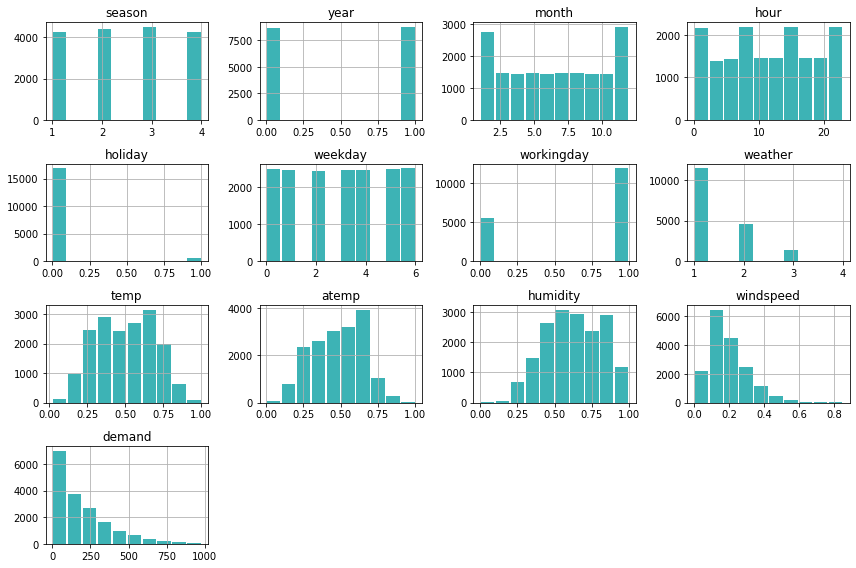

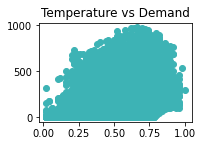

In [4]:
## Basic libs
import pandas as pd
import numpy as np
import warnings

## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Set Default colors for charts
from ColorPallette import *

#Load Data
data_folder = "C:\\Users\\elidmoore\\Documents\Personal Documents\\Data Science 2021 Course\\006 - Kaggle Project\\"
file_to_open = data_folder + "hour.CSV"
open_file = open(file_to_open)
bikes = pd.read_csv(open_file)

#What are the columns and their type for a dataframe (df)?
bikes.info()
bikes.head()

#Summary of Data
#Season: 1. Spring 2. Summer 3.Fall 4.Winter
#Holiday 1.Yes 0.No
#Weekday 0-6 for Sunday to Saturday
#WorkingDay - 0.No 1.Yes
#Weather - 1. Clear, Few Clouds, Partly Cloudy
#Weather - 2. Mist+Cloudy, Mist+Broken Clouds, Mist + few clouds, Mist
#Weather - 3. Light Snow, Light Rain+Thunderstorm + Scattered clouds, Light rain + scattered clouds
#Weather - 4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#atemp - "feels like: temperature"
#casual - non-registered users
#registered - registered users
#cnt - total count of registered + casual users


# -------------------------------------------------
# Step 2 - Preliminary Analysis & Feature Selection
# -------------------------------------------------

#create a copy dataframe & drop variables that are not needed our features, axis = 1 means drop
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index', 'date', 'casual', 'registered'], axis=1)

#basic checks of missing values, there are no 'null' values
bikes_prep.isnull().sum()

#visualize the data using historgram and plot in separate window
bikes_prep.hist(rwidth=0.9,figsize=(12,8))
plt.tight_layout()
plt.show()

# -------------------------------------------------
# Step 2 - Preliminary Analysis & Feature Selection
# -------------------------------------------------

#Visualize the continuous features vs demand
plt.subplot(2, 2, 1)
plt.title('Temperature vs Demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'])